# 텐서플로 API

In [ ]:
#파이썬≥3.5 필수
import sys
assert sys.version_info>=(3,5)

#사이킷런≥2.0 필수
import sklearn
assert sklearn.__version__>="0.20"

try:
  #tensorflow_version은 코랩 명령
  %tensorflow_version 2.x
except Exception:
  pass

#텐서플로≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__>="2.0"

#공통 모듈 임포트
import numpy as np
import os

#노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

#깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

## 넘파이처럼 텐서플로 사용하기

### 텐서와 연산

텐서

In [ ]:
tf.constant([[1.,2.,3.],[4.,5.,6.]])  #행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.constant(42) #스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [ ]:
t=tf.constant([[1.,2.,3.],[4.,5.,6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
t.shape

TensorShape([2, 3])

In [ ]:
t.dtype

tf.float32

인덱싱

In [ ]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [ ]:
t[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

연산

In [ ]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t@tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

keras.backend 사용하기

In [ ]:
from tensorflow import keras
K=keras.backend
K.square(K.transpose(t))+10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### 텐서와 넘파이

In [ ]:
a=np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [ ]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [ ]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### 타입 변환

In [ ]:
try:
  tf.constant(2.0)+tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [ ]:
try:
  tf.constant(2.0)+tf.constant(40.,dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [ ]:
t2=tf.constant(40.,dtype=tf.float64)
tf.constant(2.0)+tf.cast(t2,tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 변수

In [ ]:
v=tf.Variable([[1.,2.,3.],[4.,5.,6.]])

In [ ]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[:,2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [ ]:
try:
  v[1]=[7.,8.,9.]
except TypeError as ex:
  print(ex)

'ResourceVariable' object does not support item assignment


In [ ]:
v.scatter_nd_update(indices=[[0,0],[1,2]],
                    updates=[100.,200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [ ]:
sparse_delta=tf.IndexedSlices(values=[[1.,2.,3.],[4.,5.,6.]],
                              indices=[1,0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### 다른 데이터 구조

문자열

In [ ]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [ ]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [ ]:
u=tf.constant([ord(c)for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [ ]:
b=tf.strings.unicode_encode(u,"UTF-8")
tf.strings.length(b,unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
tf.strings.unicode_decode(b,"UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

문자열 배열

In [ ]:
p=tf.constant(["Café","Coffee","caffè","咖啡"])

In [ ]:
tf.strings.length(p,unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [ ]:
r=tf.strings.unicode_decode(p,"UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [ ]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


래그드 텐서

In [ ]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [ ]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [ ]:
r2=tf.ragged.constant([[65,66],[],[67]])
print(tf.concat([r,r2],axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [ ]:
r3=tf.ragged.constant([[68,69,70],[71],[],[72,73]])
print(tf.concat([r,r3],axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [ ]:
tf.strings.unicode_encode(r3,"UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [ ]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

희소 텐서

In [ ]:
s=tf.SparseTensor(indices=[[0,1],[1,0],[2,3]],
                  values=[1.,2.,3.],
                  dense_shape=[3,4])

In [ ]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [ ]:
s2=s*2.0

In [ ]:
try:
  s3=s+1.
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [ ]:
s4=tf.constant([[10.,20.],[30.,40.],[50.,60.],[70.,80.]])
tf.sparse.sparse_dense_matmul(s,s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [ ]:
s5=tf.SparseTensor(indices=[[0,2],[0,1]],
                   values=[1.,2.],
                   dense_shape=[3,4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
try:
  tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [ ]:
s6=tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

텐서 배열

In [ ]:
array=tf.TensorArray(dtype=tf.float32,size=3)
array=array.write(0,tf.constant([1.,2.]))
array=array.write(1,tf.constant([3.,10.]))
array=array.write(2,tf.constant([5.,7.]))

In [ ]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [ ]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [ ]:
mean,variance=tf.nn.moments(array.stack(),axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [ ]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

집합

In [ ]:
set1=tf.constant([[2,3,5,7],[7,9,0,0]])
set2=tf.constant([[4,5,6],[9,10,0]])
tf.sparse.to_dense(tf.sets.union(set1,set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [ ]:
tf.sparse.to_dense(tf.sets.difference(set1,set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [ ]:
tf.sparse.to_dense(tf.sets.intersection(set1,set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

## 사용자 정의 모델과 훈련 알고리즘

### 사용자 정의 손실 함수

캘리포니아 주택 데이터셋을 로드하여 준비  
먼저 이 데이터셋을 로드한 다음 훈련 세트, 검증 세트, 테스트 세트로 나누고 마지막으로 스케일을 변경 :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(
    housing.data,housing.target.reshape(-1,1),random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(
    X_train_full,y_train_full,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)
X_test_scaled=scaler.transform(X_test)

In [ ]:
def huber_fn(y_true,y_pred):
  error=y_true-y_pred
  is_small_error=tf.abs(error)<1
  squared_loss=tf.square(error)/2
  linear_loss=tf.abs(error)-0.5
  return tf.where(is_small_error,squared_loss,linear_loss)

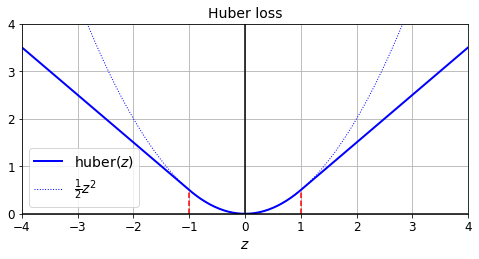

In [ ]:
plt.figure(figsize=(8,3.5))
z=np.linspace(-4,4,200)
plt.plot(z,huber_fn(0,z),"b-",linewidth=2,label="huber($z$)")
plt.plot(z,z**2/2,"b:",linewidth=1,label=r"$\frac{1}{2}z^2$")
plt.plot([-1,-1],[0,huber_fn(0.,-1.)],"r--")
plt.plot([1,1],[0,huber_fn(0.,1.)],"r--")
plt.gca().axhline(y=0,color='k')
plt.gca().axvline(x=0,color='k')
plt.axis([-4,4,0,4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss",fontsize=14)
plt.show()

In [ ]:
input_shape=X_train.shape[1:]

model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=huber_fn,optimizer="nadam",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


### 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [ ]:
model.save("my_model_with_a_custom_loss.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_loss.h5",
                              custom_objects={"huber_fn":huber_fn})

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


In [ ]:
def create_huber(threshold=1.0):
  def huber_fn(y_true,y_pred):
    error=y_true-y_pred
    is_small_error=tf.abs(error)<threshold
    squared_loss=tf.square(error)/2
    linear_loss=threshold*tf.abs(error)-threshold**2/2
    return tf.where(is_small_error,squared_loss,linear_loss)
  return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0),optimizer="nadam",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [ ]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                              custom_objects={"huber_fn":create_huber(2.0)})

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2147 - mean_absolute_error: 0.4800 - val_loss: 0.2133 - val_mean_absolute_error: 0.4654
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2119 - mean_absolute_error: 0.4762 - val_loss: 0.1992 - val_mean_absolute_error: 0.4643


In [ ]:
class HuberLoss(keras.losses.Loss):
  def __init__(self,threshold=1.0,**kwargs):
    self.threshold=threshold
    super().__init__(**kwargs)
  def call(self,y_true,y_pred):
    error=y_true-y_pred
    is_small_error=tf.abs(error)<self.threshold
    squared_loss=tf.square(error)/2
    linear_loss=self.threshold*tf.abs(error)-self.threshold**2/2
    return tf.where(is_small_error,squared_loss,linear_loss)
  def get_config(self):
    base_config=super().get_config()
    return {**base_config,"threshold":self.threshold}

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=HuberLoss(2.),optimizer="nadam",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089


In [ ]:
model.save("my_model_with_a_custom_loss_class.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                              custom_objects={"HuberLoss":HuberLoss})

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2286 - mean_absolute_error: 0.4970 - val_loss: 0.2120 - val_mean_absolute_error: 0.4723
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2216 - mean_absolute_error: 0.4904 - val_loss: 0.2045 - val_mean_absolute_error: 0.4725


In [ ]:
model=keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                              custom_objects={"HuberLoss":HuberLoss})

In [ ]:
model.loss.threshold

2.0

### 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def my_softplus(z): #tf.nn.softplus(z) 값을 반환
  return tf.math.log(tf.exp(z)+1.0)

def my_glorot_initializer(shape,dtype=tf.float32):
  stddev=tf.sqrt(2./(shape[0]+shape[1]))
  return tf.random.normal(shape,stddev=stddev,dtype=dtype)

def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01*weights))

def my_positive_weights(weights): #tf.nn.relu(weights) 값을 반환
  return tf.where(weights<0.,tf.zeros_like(weights),weights)

In [ ]:
layer=keras.layers.Dense(1,activation=my_softplus,
                         kernel_initializer=my_glorot_initializer,
                         kernel_regularizer=my_l1_regularizer,
                         kernel_constraint=my_positive_weights)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1,activation=my_softplus,
                                                  kernel_regularizer=my_l1_regularizer,
                                                  kernel_constraint=my_positive_weights,
                                                  kernel_initializer=my_glorot_initializer),
])

In [ ]:
model.compile(loss="mse",optimizer="nadam",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [ ]:
model.save("my_model_with_many_custom_parts.h5")

In [ ]:
model=keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "my_l1_regularizer":my_l1_regularizer,
        "my_positive_weights":my_positive_weights,
        "my_glorot_initializer":my_glorot_initializer,
        "my_softplus":my_softplus,
    }
)

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self,factor):
    self.factor=factor
  def __call__(self,weights):
    return tf.reduce_sum(tf.abs(self.factor*weights))
  def get_config(self):
    return {"factor":self.factor}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1,activation=my_softplus,
                                                  kernel_regularizer=MyL1Regularizer(0.01),
                                                  kernel_constraint=my_positive_weights,
                                                  kernel_initializer=my_glorot_initializer),
])

In [ ]:
model.compile(loss="mse",optimizer="nadam",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [ ]:
model.save("my_model_with_many_custom_parts.h5")

In [ ]:
model=keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "MyL1Regularizer":MyL1Regularizer,
        "my_positive_weights":my_positive_weights,
        "my_glorot_initializer":my_glorot_initializer,
        "my_softplus":my_softplus,
    }
)

### 사용자 정의 지표

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1),
])

In [ ]:
model.compile(loss="mse",optimizer="nadam",metrics=[create_huber(2.0)])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 884us/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 0s 868us/step - loss: 0.6052 - huber_fn: 0.2733


경고 : 손실과 지표에 같은 함수를 사용하면 다른 결과가 나올 수 있다. (일반적으로 부동 소수점 정밀도 오차 때문)  
수학 식이 동일하더라도 연산은 동일한 순서대로 실행되지 않아 작은 차이가 발생  
또한 샘플 가중치를 사용하면 정밀도보다 더 큰 오차가 생긴다 :

- 에포크에서 손실은 지금까지 본 모든 배치 손실의 평균, 각 배치 손실은 가중치가 적용된 샘플 손실의 합을 배치 크기 로 나눈 것 (샘플 가중치의 합으로 나눈 것이 아니기 때문에 배치 손실은 손실의 가중 평균이 아니다.)
- 에포크에서 지표는 가중치가 적용된 샘플 손실의 합을 지금까지 본 모든 샘플 가중치의 합으로 나눈 것, 다른 말로하면 모든 샘플 손실의 가중 평균이기 때문에 위와 같지 않다.

수학적으로 말하면 손실 = 지표 * 샘플 가중치의 평균(더하기 약간의 부동 소수점 정밀도 오차)

In [ ]:
model.compile(loss=create_huber(2.0),optimizer="nadam",metrics=[create_huber(2.0)])

In [ ]:
sample_weight=np.random.rand(len(y_train))
history=model.fit(X_train_scaled,y_train,epochs=2,sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 997us/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 0s 917us/step - loss: 0.1131 - huber_fn: 0.2297


In [ ]:
history.history["loss"][0],history.history["huber_fn"][0]*sample_weight.mean()

(0.11749906837940216, 0.11906626312604573)

스트리밍 지표

In [ ]:
precision=keras.metrics.Precision()
precision([0,1,1,1,0,1,0,1],[1,1,0,1,0,1,0,1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [ ]:
precision([0,1,0,0,1,0,1,1],[1,0,1,1,0,0,0,0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [ ]:
precision.reset_states()

스트리밍 지표 만들기 :

In [ ]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self,threshold=1.0,**kwargs):
    super().__init__(**kwargs)  #기본 매개변수 처리 (e.g. dtype)
    self.threshold=threshold
    self.huber_fn=create_huber(threshold)
    self.total=self.add_weight("total",initializer="zeros")
    self.count=self.add_weight("count",initializer="zeros")
  def update_state(self,y_true,y_pred,sample_weight=None):
    metric=self.huber_fn(y_true,y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(tf.cast(tf.size(y_true),tf.float32))
  def result(self):
    return self.total/self.count
  def get_config(self):
    base_config=super().get_config()
    return {**base_config,"threshold":self.threshold}

In [ ]:
m=HuberMetric(2.)

#total=2*|10-2|-2²/2=14
#count=1
#result=14/1=14
m(tf.constant([[2.]]),tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [ ]:
#total=total+(|1-0|²/2)+(2*|9.25-5|-2²/2)=14+7=21
#count=count+2=3
#result=total/count=21/3=7
m(tf.constant([[0.],[5.]]),tf.constant([[1.],[9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [ ]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [ ]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

HuberMetric 클래스가 잘 동작하는지 확인 :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=create_huber(2.0),optimizer="nadam",metrics=[HuberMetric(2.0)])

In [ ]:
model.fit(X_train_scaled.astype(np.float32),y_train.astype(np.float32),epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2595 - huber_metric: 0.2595


In [ ]:
model.save("my_model_with_a_custom_metric.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_metric.h5",
                              custom_objects={"huber_fn":create_huber(2.0),
                                              "HuberMetric":HuberMetric})

In [ ]:
model.fit(X_train_scaled.astype(np.float32),y_train.astype(np.float32),epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 900us/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 0s 899us/step - loss: 0.2278 - huber_metric: 0.2278


경고 : 텐서플로 2.2에서 tf.keras가 model.metrics의 0번째 위치에 지표를 추가  
따라서 HuberMetric에 접근하려면 model.metrics[0] 대신 model.metrics[-1]를 사용

In [ ]:
model.metrics[-1].threshold

2.0

더 간단한 클래스 :

In [ ]:
class HuberMetric(keras.metrics.Mean):
  def __init__(self,threshold=1.0,name='HuberMetric',dtype=None):
    self.threshold=threshold
    self.huber_fn=create_huber(threshold)
    super().__init__(name=name,dtype=dtype)
  def update_state(self,y_true,y_pred,sample_weight=None):
    metric=self.huber_fn(y_true,y_pred)
    super(HuberMetric,self).update_state(metric,sample_weight)
  def get_config(self):
    base_config=super().get_config()
    return {**base_config,"threshold":self.threshold}

이 클래스는 크기를 잘 처리하고 샘플 가중치도 지원

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="selu",kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=keras.losses.Huber(2.0),optimizer="nadam",weighted_metrics=[HuberMetric(2.0)])

In [ ]:
sample_weight=np.random.rand(len(y_train))
history=model.fit(X_train_scaled.astype(np.float32),y_train.astype(np.float32),
                  epochs=2,sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.4455 - HuberMetric: 0.8978
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1305 - HuberMetric: 0.2631


In [ ]:
history.history["loss"][0],history.history["HuberMetric"][0]*sample_weight.mean()

(0.44554394483566284, 0.44554404180100277)

In [ ]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                              custom_objects={"HuberMetric":HuberMetric})

In [ ]:
model.fit(X_train_scaled.astype(np.float32),y_train.astype(np.float32),epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 921us/step - loss: 0.2377 - HuberMetric: 0.2377
Epoch 2/2
363/363 [==============================] - 0s 925us/step - loss: 0.2279 - HuberMetric: 0.2279


경고 : 텐서플로 2.2에서 tf.keras가 model.metrics의 0번째 위치에 지표를 추가  
따라서 HuberMetric에 접근하려면 model.metrics[0] 대신 model.metrics[-1]를 사용

In [ ]:
model.metrics[-1].threshold

2.0

### 사용자 정의 층

In [ ]:
exponential_layer=keras.layers.Lambda(lambda x:tf.exp(x))

In [ ]:
exponential_layer([-1.,0.,1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

회귀 모델이 예측할 값이 양수이고 스케일이 매우 다른 경우 (e.g. 0.001, 10., 10000) 출력층에 지수 함수를 추가하면 유용 :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="relu",input_shape=input_shape),
                               keras.layers.Dense(1),
                               exponential_layer
])
model.compile(loss="mse",optimizer="nadam")
model.fit(X_train_scaled,y_train,epochs=5,
          validation_data=(X_valid_scaled,y_valid))
model.evaluate(X_test_scaled,y_test)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 846us/step - loss: nan


nan

In [ ]:
class MyDense(keras.layers.Layer):
  def __init__(self,units,activation=None,**kwargs):
    super().__init__(**kwargs)
    self.units=units
    self.activation=keras.activations.get(activation)
  
  def build(self,batch_input_shape):
    self.kernel=self.add_weight(
        name="kernel",shape=[batch_input_shape[-1],self.units],
        initializer="glorot_normal"
    )
    self.bais=self.add_weight(
        name="bias",shape=[self.units],initializer="zeros"
    )
    super().build(batch_input_shape)  #must be at the end
  
  def call(self,X):
    return self.activation(X@self.kernel+self.bais)
  
  def compute_output_shape(self,batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
  
  def get_config(self):
    base_config=super().get_config()
    return {**base_config,"units":self.units,
            "activation":keras.activations.serialize(self.activation)}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
                               MyDense(30,activation="relu",input_shape=input_shape),
                               MyDense(1)
])

In [ ]:
model.compile(loss="mse",optimizer="nadam")
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))
model.evaluate(X_test_scaled,y_test)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 677us/step - loss: 0.5474


0.5473727583885193

In [ ]:
model.save("my_model_with_a_custom_layer.h5")

In [ ]:
model=keras.models.load_model("my_model_with_a_custom_layer.h5",
                              custom_objects={"MyDense":MyDense})

In [ ]:
model.compile(loss="mse",optimizer="nadam")
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))
model.evaluate(X_test_scaled,y_test)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.4904 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 791us/step - loss: 0.3990


0.39900389313697815

In [ ]:
class MyMultiLayer(keras.layers.Layer):
  def call(self,X):
    X1,X2=X
    return X1+X2,X1*X2
  
  def compute_output_shape(self,batch_input_shape):
    batch_input_shape1,batch_input_shape2=batch_input_shape
    return [batch_input_shape1,batch_input_shape2]

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
inputs1=keras.layers.Input(shape=[2])
inputs2=keras.layers.Input(shape=[2])
outputs1,outputs2=MyMultiLayer()((inputs1,inputs2))

훈련과 테스트에서 다르게 동작하는 층 :

In [ ]:
class AddGaussianNoise(keras.layers.Layer):
  def __init__(self,stddev,**kwargs):
    super().__init__(**kwargs)
    self.stddev=stddev
  
  def call(self,X,training=None):
    if training:
      noise=tf.random.normal(tf.shape(X),stddev=self.stddev)
      return X+noise
    else:
      return X
  
  def compute_output_shape(self,batch_input_shape):
    return batch_input_shape

### 사용자 정의 모델

In [ ]:
X_new_scaled=X_test_scaled

In [ ]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self,n_layers,n_neurons,**kwargs):
    super().__init__(**kwargs)
    self.hidden=[keras.layers.Dense(n_neurons,activation="elu",
                                    kernel_initializer="he_normal")
    for _ in range(n_layers)]
  
  def call(self,inputs):
    Z=inputs
    for layer in self.hidden:
      Z=layer(Z)
    return inputs+Z

In [ ]:
class ResidualRegressor(keras.models.Model):
  def __init__(self,output_dim,**kwargs):
    super().__init__(**kwargs)
    self.hidden1=keras.layers.Dense(30,activation="elu",
                                    kernel_initializer="he_normal")
    self.block1=ResidualBlock(2,30)
    self.block2=ResidualBlock(2,30)
    self.out=keras.layers.Dense(output_dim)
  
  def call(self,inputs):
    Z=self.hidden1(inputs)
    for _ in range(1+3):
      Z=self.block1(Z)
    Z=self.block2(Z)
    return self.out(Z)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=ResidualRegressor(1)
model.compile(loss="mse",optimizer="nadam")
history=model.fit(X_train_scaled,y_train,epochs=5)
score=model.evaluate(X_test_scaled,y_test)
y_pred=model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 9.1324
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.0578
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8866
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5842
Epoch 5/5
162/162 [==============================] - 0s 825us/step - loss: 0.6481


In [ ]:
model.save("my_custom_model.ckpt")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [ ]:
model=keras.models.load_model("my_custom_model.ckpt")

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 0.9154
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4779
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4867
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5609
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5365


시퀀셜 API를 사용하는 모델을 정의할 수 있다 :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
block1=ResidualBlock(2,30)
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="elu",kernel_initializer="he_normal"),
                               block1,block1,block1,block1,
                               ResidualBlock(2,30),
                               keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",optimizer="nadam")
history=model.fit(X_train_scaled,y_train,epochs=5)
score=model.evaluate(X_test_scaled,y_test)
y_pred=model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8695
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4720
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5537
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3809
Epoch 5/5
162/162 [==============================] - 0s 880us/step - loss: 0.4852


### 모델 구성 요소에 기반한 손실과 지표

In [ ]:
class ReconstructingRegressor(keras.models.Model):
  def __init__(self,output_dim,**kwargs):
    super().__init__(**kwargs)
    self.hidden=[keras.layers.Dense(30,activation="selu",
                                    kernel_initializer="lecun_normal")
    for _ in range(5)]
    self.out=keras.layers.Dense(output_dim)
    self.reconstruction_mean=keras.metrics.Mean(name="reconstruction_error")
  
  def build(self,batch_input_shape):
    n_inputs=batch_input_shape[-1]
    self.reconstruct=keras.layers.Dense(n_inputs,name='recon')
    super().build(batch_input_shape)
  
  def call(self,inputs,training=None):
    Z=inputs
    for layer in self.hidden:
      Z=layer(Z)
    reconstruction=self.reconstruct(Z)
    self.recon_loss=0.05*tf.reduce_mean(tf.square(reconstruction-inputs))

    if training:
      result=self.reconstruction_mean(recon_loss)
      self.add_metric(result)
    return self.out(Z)
  
  def train_step(self,data):
    x,y=data

    with tf.GradientTape() as tape:
      y_pred=self(x)
      loss=self.compiled_loss(y,y_pred,regularization_losses=[self.recon_loss])

      gradients=tape.gradient(loss,self.trainable_variables)
      self.optimizer.apply_gradients(zip(gradients,self.trainable_variables))

      return {m.name:m.result()for m in self.metrics}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=ReconstructingRegressor(1)
model.compile(loss="mse",optimizer="nadam")
history=model.fit(X_train_scaled,y_train,epochs=2)
y_pred=model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.7885 - reconstruction_error: 0.0000e+00
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4126 - reconstruction_error: 0.0000e+00


### 자동 미분을 사용하여 그레이디언트 계산하기

In [ ]:
def f(w1,w2):
  return 3*w1**2+2*w1*w2

In [ ]:
w1,w2=5,3
eps=1e-6
(f(w1+eps,w2)-f(w1,w2))/eps

36.000003007075065

In [ ]:
(f(w1,w2+eps)-f(w1,w2))/eps

10.000000003174137

In [ ]:
w1,w2=tf.Variable(5.),tf.Variable(3.)
with tf.GradientTape() as tape:
  z=f(w1,w2)

gradients=tape.gradient(z,[w1,w2])

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
with tf.GradientTape() as tape:
  z=f(w1,w2)

dz_dw1=tape.gradient(z,w1)
try:
  dz_dw2=tape.gradient(z,w2)
except RuntimeError as ex:
  print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [ ]:
with tf.GradientTape(persistent=True) as tape:
  z=f(w1,w2)

dz_dw1=tape.gradient(z,w1)
dz_dw2=tape.gradient(z,w2)  #works now!
del tape

In [ ]:
dz_dw1,dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [ ]:
c1,c2=tf.constant(5.),tf.constant(3.)
with tf.GradientTape() as tape:
  z=f(c1,c2)

gradients=tape.gradient(z,[c1,c2])

In [ ]:
gradients

[None, None]

In [ ]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z=f(c1,c2)

gradients=tape.gradient(z,[c1,c2])

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
with tf.GradientTape() as tape:
  z1=f(w1,w2+2.)
  z2=f(w1,w2+5.)
  z3=f(w1,w2+7.)

tape.gradient([z1,z2,z3],[w1,w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [ ]:
with tf.GradientTape(persistent=True) as tape:
  z1=f(w1,w2+2.)
  z2=f(w1,w2+5.)
  z3=f(w1,w2+7.)

tf.reduce_sum(tf.stack([tape.gradient(z,[w1,w2])for z in (z1,z2,z3)]),axis=0)
del tape

In [ ]:
with tf.GradientTape(persistent=True) as hessian_tape:
  with tf.GradientTape() as jacobian_tape:
    z=f(w1,w2)
  jacobians=jacobian_tape.gradient(z,[w1,w2])
hessians=[hessian_tape.gradient(jacobian,[w1,w2])for jacobian in jacobians]
del hessian_tape

In [ ]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [ ]:
def f(w1,w2):
  return 3*w1**2+tf.stop_gradient(2*w1*w2)

with tf.GradientTape() as tape:
  z=f(w1,w2)

tape.gradient(z,[w1,w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [ ]:
x=tf.Variable(100.)
with tf.GradientTape() as tape:
  z=my_softplus(x)

tape.gradient(z,[x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [ ]:
tf.math.log(tf.exp(tf.constant(30.,dtype=tf.float32))+1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [ ]:
x=tf.Variable([100.])
with tf.GradientTape() as tape:
  z=my_softplus(x)

tape.gradient(z,[x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [ ]:
@tf.custom_gradient
def my_better_softplus(z):
  exp=tf.exp(z)
  def my_softplus_gradients(grad):
    return grad/(1+1/exp)
  return tf.math.log(exp+1),my_softplus_gradients

In [ ]:
def my_better_softplus(z):
  return tf.where(z>30.,z,tf.math.log(tf.exp(z)+1.))

In [ ]:
x=tf.Variable([1000.])
with tf.GradientTape() as tape:
  z=my_better_softplus(x)

z,tape.gradient(z,[x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

### 사용자 정의 훈련 반복

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
l2_reg=keras.regularizers.l2(0.05)
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation="elu",kernel_initializer="he_normal",
                                                  kernel_regularizer=l2_reg),
                               keras.layers.Dense(1,kernel_regularizer=l2_reg)
])

In [ ]:
def random_batch(X,y,batch_size=32):
  idx=np.random.randint(len(X),size=batch_size)
  return X[idx],y[idx]

In [ ]:
def print_status_bar(iteration,total,loss,metrics=None):
  metrics=" - ".join(["{}: {:.4f}".format(m.name,m.result())for m in [loss]+(metrics or [])])
  end=""if iteration<total else "\n"
  print("\r{}/{} - ".format(iteration,total)+metrics,end=end)

In [ ]:
import time

mean_loss=keras.metrics.Mean(name="loss")
mean_square=keras.metrics.Mean(name="mean_square")
for i in range(1,50+1):
  loss=1/i
  mean_loss(loss)
  mean_square(i**2)
  print_status_bar(i,50,mean_loss,[mean_square])
  time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


A fancier version with a progress bar :

In [ ]:
def progress_bar(iteration,total,size=30):
  running=iteration<total
  c=">"if running else "="
  p=(size-1)*iteration//total
  fmt="{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
  params=[iteration,total,"="*p+c+"."*(size-p-1)]
  return fmt.format(*params)

In [ ]:
progress_bar(3500,10000,size=6)

' 3500/10000 [=>....]'

In [ ]:
def print_status_bar(iteration,total,loss,metrics=None,size=30):
  metrics=" - ".join(["{}: {:.4f}".format(m.name,m.result())for m in [loss]+(metrics or [])])
  end=""if iteration<total else "\n"
  print("\r{} - {}".format(progress_bar(iteration,total),metrics),end=end)

In [ ]:
mean_loss=keras.metrics.Mean(name="loss")
mean_square=keras.metrics.Mean(name="mean_square")
for i in range(1,50+1):
  loss=1/i
  mean_loss(loss)
  mean_square(i**2)
  print_status_bar(i,50,mean_loss,[mean_square])
  time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
n_epochs=5
batch_size=32
n_steps=len(X_train)//batch_size
optimizer=keras.optimizers.Nadam(lr=0.01)
loss_fn=keras.losses.mean_squared_error
mean_loss=keras.metrics.Mean()
metrics=[keras.metrics.MeanAbsoluteError()]

In [ ]:
for epoch in range(1,n_epochs+1):
  print("Epoch {}/{}".format(epoch,n_epochs))
  for step in range(1,n_steps+1):
    X_batch,y_batch=random_batch(X_train_scaled,y_train)
    with tf.GradientTape() as tape:
      y_pred=model(X_batch)
      main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
      loss=tf.add_n([main_loss]+model.losses)
    gradients=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    for variable in model.variables:
      if variable.constraint is not None:
        variable.assign(variable.constriant(variable))
    mean_loss(loss)
    for metric in metrics:
      metric(y_batch,y_pred)
    print_status_bar(step*batch_size,len(y_train),mean_loss,metrics)
  print_status_bar(len(y_train),len(y_train),mean_loss,metrics)
  for metric in [mean_loss]+metrics:
    metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 [==============================] - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 [==============================] - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 [==============================] - mean: 0.6440 - mean_absolute_error: 0.5222


In [ ]:
try:
  from tqdm.notebook import trange
  from collections import OrderedDict
  with trange(1,n_epochs+1,desc="All epochs")as epochs:
    for epoch in epochs:
      with trange(1,n_steps+1,desc="Epoch {}/{}".format(epoch,n_epochs))as steps:
        for step in steps:
          X_batch,y_batch=random_batch(X_train_scaled,y_train)
          with tf.GradientTape() as tape:
            y_pred=model(X_batch)
            main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
            loss=tf.add_n([main_loss]+model.losses)
          gradients=tape.gradient(loss,model.trainable_variables)
          optimizer.apply_gradients(zip(gradients,model.trainable_variables))
          for varaible in model.variables:
            if variable.constraint is not None:
              variable.assign(variable.constraint(variable))
          status=OrderedDict()
          mean_loss(loss)
          status["loss"]=mean_loss.result().numpy()
          for metric in metrics:
            metric(y_batch,y_pred)
            status[metric.name]=metric.result().numpy()
          steps.set_postfix(status)
      for metric in [mean_loss]+metrics:
        metric.reset_states()
except ImportError as ex:
  print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

### 사용자 정의 옵티마이저

사용자 정의 옵티마이저를 정의하는 것은 일반적이지 않다.  
하지만 어쩔 수 없이 만들어야 하는 상황이라면 다음 예를 참고 :

In [ ]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
  def __init__(self,learning_rate=0.001,momentum=0.9,name="MyMomentumOptimizer",**kwargs):
    """super().__init__()를 호출하고 _set_hyper()를 사용해 하이퍼파라미터를 저장"""
    super().__init__(name,**kwargs)
    self._set_hyper("learning_rate",kwargs.get("lr",learning_rate)) #lr=learning_rate을 처리
    self._set_hyper("decay",self._initial_decay)
    self._set_hyper("momentum",momentum)
  
  def _create_slots(self,var_list):
    """
    모델 파라미터마다 연관된 옵티마이저 변수를 만든다.
    텐서플로는 이런 옵티마이저 변수를 '슬롯'이라고 부른다.
    모멘텀 옵티마이저에서는 모델 파라미터마다 하나의 모멘텀 슬롯이 필요
    """
    for var in var_list:
      self.add_slot(var,"momentum")
  
  @tf.function
  def _resource_apply_dense(self,grad,var):
    """"슬롯을 업데이트하고 모델 파라미터에 대한 옵티마이저 스텝을 수행"""
    var_dtype=var.dtype.base_dtype
    lr_t=self._decayed_lr(var_dtype)  #학습률 감쇠 처리
    momentum_var=self.get_slot(var,"momentum")
    momentum_hyper=self._get_hyper("momentum",var_dtype)
    momentum_var.assign(momentum_var*momentum_hyper-(1.-momentum_hyper)*grad)
    var.assign_add(momentum_var*lr_t)
  
  def _resource_apply_sparse(self,grad,var):
    raise NotlmplementedError
  
  def get_config(self):
    base_config=super().get_config()
    return {
        **base_config,
        "learning_rate":self._serialize_hyperparameter("learning_rate"),
        "decay":self._serialize_hyperparameter("decay"),
        "momentum":self._serialize_hyperparameter("momentum"),
    }

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([keras.layers.Dense(1,input_shape=[8])])
model.compile(loss="mse",optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
363/363 [==============================] - 0s 804us/step - loss: 3.8128
Epoch 2/5
363/363 [==============================] - 0s 761us/step - loss: 1.4877
Epoch 3/5
363/363 [==============================] - 0s 715us/step - loss: 0.9162
Epoch 4/5
363/363 [==============================] - 0s 724us/step - loss: 0.7587
Epoch 5/5
363/363 [==============================] - 0s 720us/step - loss: 0.7050


## 텐서플로 함수와 그래프

In [ ]:
def cube(x):
  return x**3

In [ ]:
cube(2)

8

In [ ]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
tf_cube=tf.function(cube)
tf_cube

In [ ]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

### TF 함수와 콘크리트 함수

In [ ]:
concrete_function=tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [ ]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### 함수 정의와 함수 그래프 탐험하기

In [ ]:
concrete_function.graph

In [ ]:
ops=concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [ ]:
pow_op=ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [ ]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [ ]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [ ]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [ ]:
concrete_function.function_def.signature

name: "__inference_cube_1056131"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### 트레이싱 자세히 보기

In [ ]:
@tf.function
def tf_cube(x):
  print("print:",x)
  return x**3

In [ ]:
result=tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [ ]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
result=tf_cube(2)
result=tf_cube(3)
result=tf_cube(tf.constant([[1.,2.]]))  #New shape : trace!
result=tf_cube(tf.constant([[3.,4.],[5.,6.]]))  #New shape : trace!
result=tf_cube(tf.constant([[7.,8.],[9.,10.]])) #no trace

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)


특정 입력 시그니처를 지정하는 것도 가능 :

In [ ]:
@tf.function(input_signature=[tf.TensorSpec([None,28,28],tf.float32)])
def shrink(images):
  print("트레이싱",images)
  return images[:,::2,::2]  #행과 열의 절반을 버린다.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
img_batch_1=tf.random.uniform(shape=[100,28,28])
img_batch_2=tf.random.uniform(shape=[50,28,28])
preprocessed_images=shrink(img_batch_1) #함수 트레이싱
preprocessed_images=shrink(img_batch_2) #동일한 콘크리트 함수 재사용

트레이싱 Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [ ]:
img_batch_3=tf.random.uniform(shape=[2,2,2])
try:
  preprocessed_images=shrink(img_batch_3) #다른 타입이나 크기 거부
except ValueError as ex:
  print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### AutoGraph를 사용해 제어 흐름 표현하기

range()를 사용한 정적인 for 반복 :

In [ ]:
@tf.function
def add_10(x):
  for i in range(10):
    x+=1
  return x

In [ ]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

tf.while_loop()를 사용한 동적인 반복 :

In [ ]:
@tf.function
def add_10(x):
  condition=lambda i,x:tf.less(i,10)
  body=lambda i,x:(tf.add(i,1),tf.add(x,1))
  final_i,final_x=tf.while_loop(condition,body,[tf.constant(0),x])
  return final_x

In [ ]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

(오토그래프에 의한) tf.range()를 사용한 동적인 for 반복 :

In [ ]:
@tf.function
def add_10(x):
  for i in tf.range(10):
    x=x+1
  return x

In [ ]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### TF 함수에서 변수와 다른 리소스 다루기

In [ ]:
counter=tf.Variable(0)

@tf.function
def increment(counter,c=1):
  return counter.assign_add(c)

In [ ]:
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
function_def=increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [ ]:
counter=tf.Variable(0)

@tf.function
def increment(c=1):
  return counter.assign_add(c)

In [ ]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
function_def=increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [ ]:
class Counter:
  def __init__(self):
    self.counter=tf.Variable(0)
  
  @tf.function
  def increment(self,c=1):
    return self.counter.assign_add(c)

In [ ]:
c=Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
@tf.function
def add_10(x):
  for i in tf.range(10):
    x+=1
  return x

tf.autograph.to_code(add_10.python_function)

"def tf__add(x):\n    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n        do_return = False\n        retval_ = ag__.UndefinedReturnValue()\n\n        def get_state():\n            return (x,)\n\n        def set_state(vars_):\n            nonlocal x\n            (x,) = vars_\n\n        def loop_body(itr):\n            nonlocal x\n            i = itr\n            x = ag__.ld(x)\n            x += 1\n        i = ag__.Undefined('i')\n        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})\n        try:\n            do_return = True\n            retval_ = ag__.ld(x)\n        except:\n            do_return = False\n            raise\n        return fscope.ret(retval_, do_return)\n"

In [ ]:
def display_tf_code(func):
  from IPython.display import display,Markdown
  if hasattr(func,"python_function"):
    func=func.python_function
  code=tf.autograph.to_code(func)
  display(Markdown('```python\n{}\n```'.format(code)))

In [ ]:
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### tf.keras에 TF 함수를 사용하기(또는 사용하지 않기)

기본적으로 tf.keras는 자동으로 사용자 정의 코드를 TF 함수로 변환하기 때문에 tf.function()을 사용할 필요가 없다 :

In [ ]:
#사용자 손실 함수
def my_mse(y_true,y_pred):
  print("my_mse() 손실 트레이싱")
  return tf.reduce_mean(tf.square(y_pred-y_true))

In [ ]:
#사용자 지표 함수
def my_mae(y_true,y_pred):
  print("my_mae() 지표 트레이싱")
  return tf.reduce_mean(tf.abs(y_pred-y_true))

In [ ]:
#사용자 정의 층
class MyDense(keras.layers.Layer):
  def __init__(self,units,activation=None,**kwargs):
    super().__init__(**kwargs)
    self.units=units
    self.activation=keras.activations.get(activation)
  
  def build(self,input_shape):
    self.kernel=self.add_weight(name='kernel',
                                shape=(input_shape[1],self.units),
                                initializer='uniform',
                                trainable=True)
    self.biases=self.add_weight(name='bais',
                                shape=(self.units,),
                                initializer='zeros',
                                trainable=True)
    super().build(input_shape)
  
  def call(self,X):
    print("MyDense.call() 트레이싱")
    return self.activation(X@self.kernel+self.biases)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#사용자 정의 모델
class MyModel(keras.models.Model):
  def __init__(self,**kwargs):
    super().__init__(**kwargs)
    self.hidden1=MyDense(30,activation="relu")
    self.hidden2=MyDense(30,activation="relu")
    self.output_=MyDense(1)
  
  def call(self,input):
    print("MyModel.call() 트레이싱")
    hidden1=self.hidden1(input)
    hidden2=self.hidden2(hidden1)
    concat=keras.layers.concatenate([input,hidden2])
    output=self.output_(concat)
    return output

model=MyModel()

In [ ]:
model.compile(loss=my_mse,optimizer="nadam",metrics=[my_mae])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))
model.evaluate(X_test_scaled,y_test)

Epoch 1/2
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
353/363 [============================>.] - ETA: 0s - loss: 1.3459 - my_mae: 0.7978MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
363/363 [==============================] - 1s 2ms/step - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 778us/step - loss: 0.4164 - my_mae: 0.4639


[0.41635245084762573, 0.4639027416706085]

dynamic=True로 모델을 만들어 이 기능을 끌 수 있다 (또는 모델의 생성자에서 super().\_\_init\_\_(dynamic=True, **kwargs)를 호출) :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=MyModel(dynamic=True)

In [ ]:
model.compile(loss=my_mse,optimizer="nadam",metrics=[my_mae])

사용자 정의 코드는 반복마다 호출  
너무 많이 출력되는 것을 피하기 위해 작은 데이터셋으로 훈련, 검증, 평가 :

In [ ]:
model.fit(X_train_scaled[:64],y_train[:64],epochs=1,
          validation_data=(X_valid_scaled[:64],y_valid[:64]),verbose=0)
model.evaluate(X_test_scaled[:64],y_test[:64],verbose=0)

MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱


[5.507260322570801, 2.0566811561584473]

또는 모델을 컴파일할 때 run_eagerly=True를 지정 :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=MyModel()

In [ ]:
model.compile(loss=my_mse,optimizer="nadam",metrics=[my_mae],run_eagerly=True)

In [ ]:
model.fit(X_train_scaled[:64],y_train[:64],epochs=1,
          validation_data=(X_valid_scaled[:64],y_valid[:64]),verbose=0)
model.evaluate(X_test_scaled[:64],y_test[:64],verbose=0)

MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱


[5.507260322570801, 2.0566811561584473]